In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from classicalfield_orig import FiniteTempGPE as gpe 
from VortexLabeling import VortexTracker as vt 
from VortexLabeling import CompareDistances as comp
from PointTracking_v2 import PointTracker as pt

In [ ]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 200000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = False, Tfact = 0.7, dst = False, vortex = True)

Total Imag Time:  1.29073166847229
kmax:  4.0212385965949355
T:  5.659625947760682


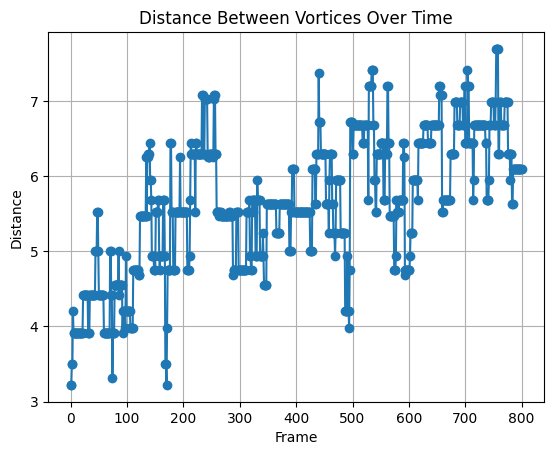

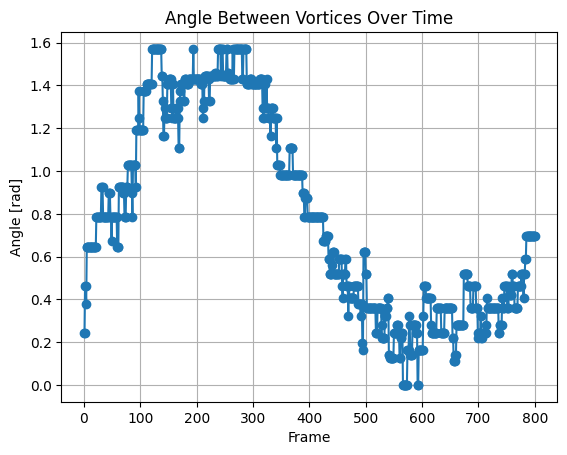

In [3]:
tracker = vt(g.snaps, g.L, g.dx)

Total Imag Time:  1.298593282699585
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)


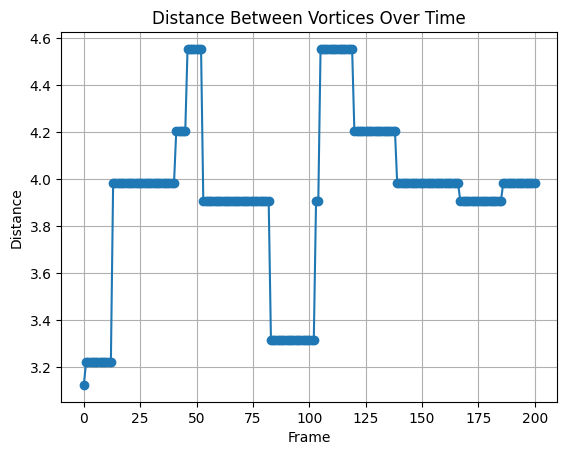

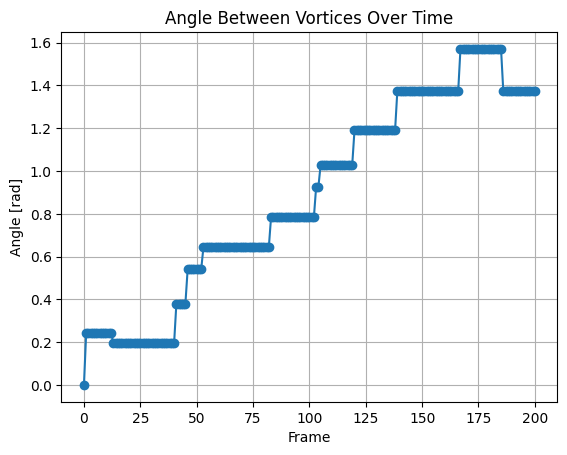

Total Imag Time:  1.279160737991333
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)


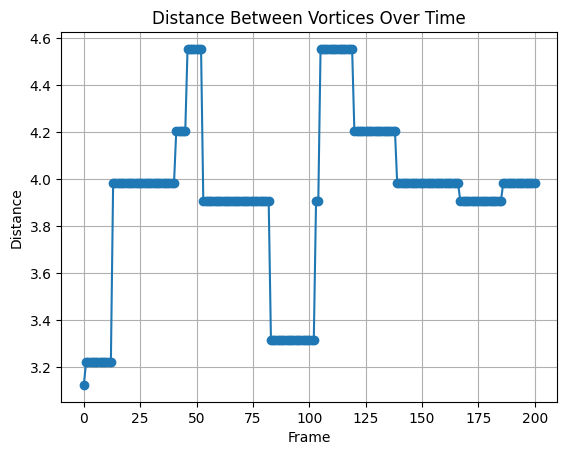

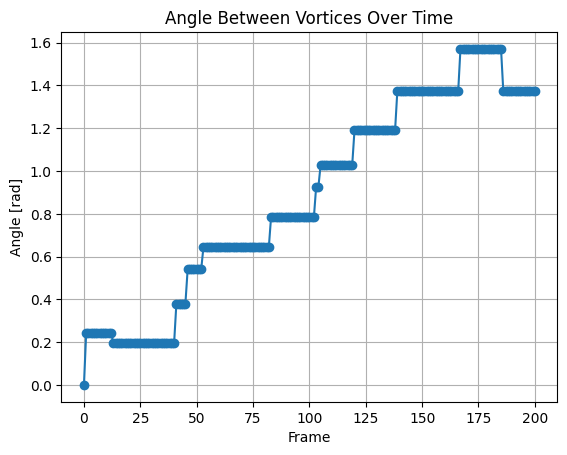

Total Imag Time:  1.2868726253509521
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)


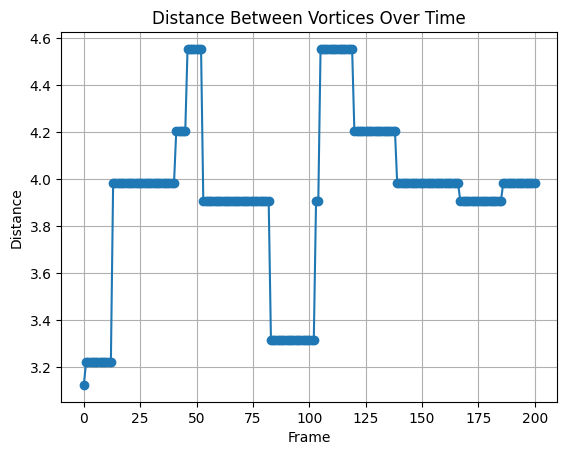

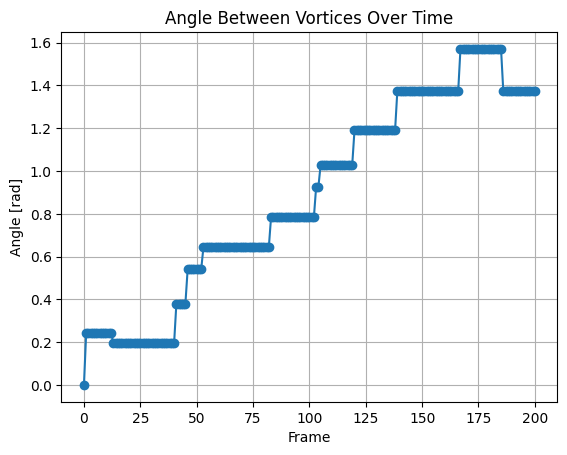

Total Imag Time:  1.2770757675170898
kmax:  4.0212385965949355
T:  0.8085179925372403
(201, 128, 128)
(1, 128, 128)


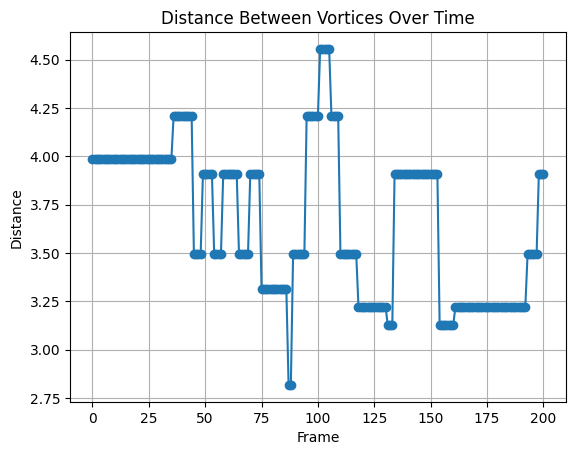

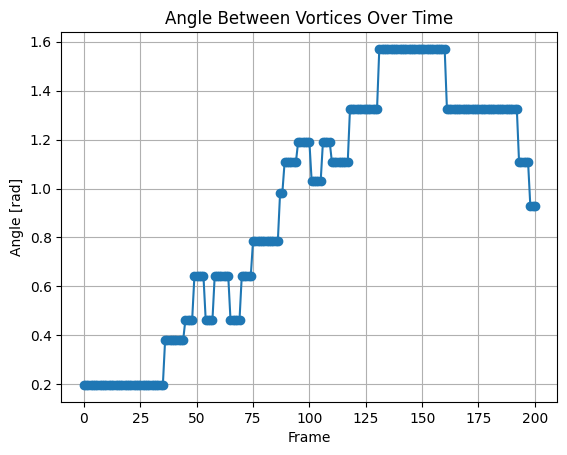

Total Imag Time:  1.266179084777832
kmax:  4.0212385965949355
T:  0.8085179925372403
(201, 128, 128)
(1, 128, 128)


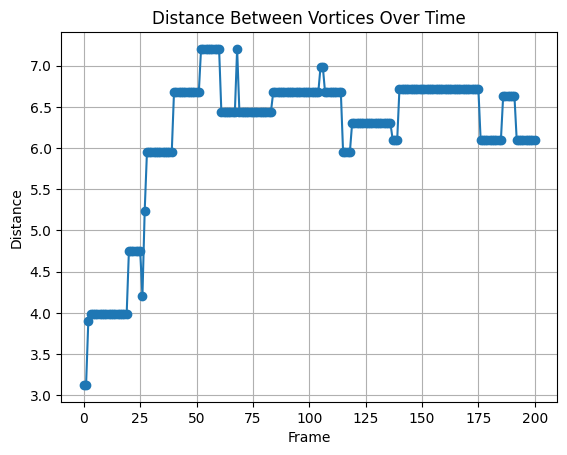

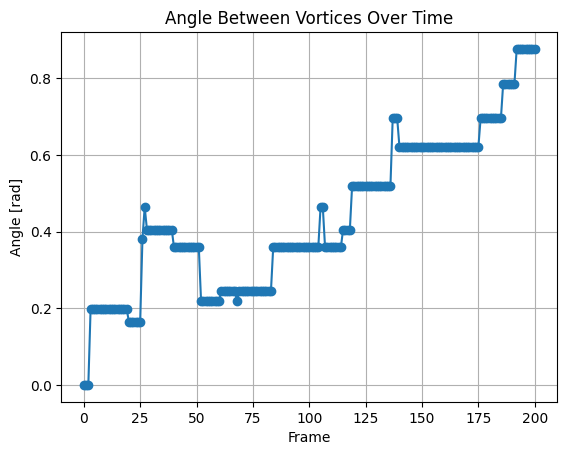

Total Imag Time:  1.2667148113250732
kmax:  4.0212385965949355
T:  0.8085179925372403
(201, 128, 128)
(1, 128, 128)


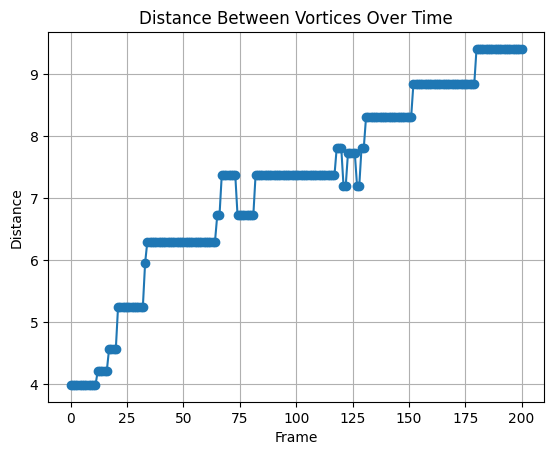

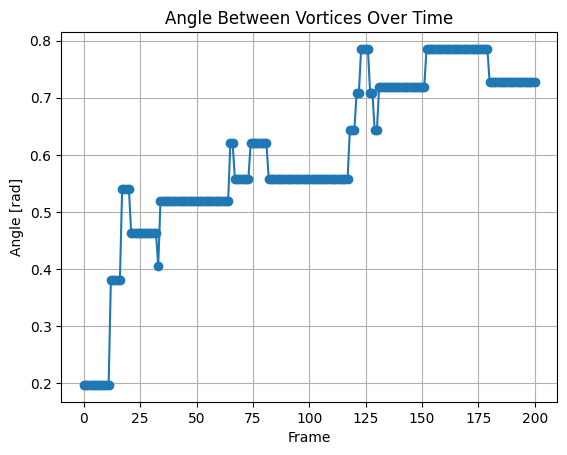

Total Imag Time:  1.2721426486968994
kmax:  4.0212385965949355
T:  1.6170359850744807
(201, 128, 128)
(1, 128, 128)


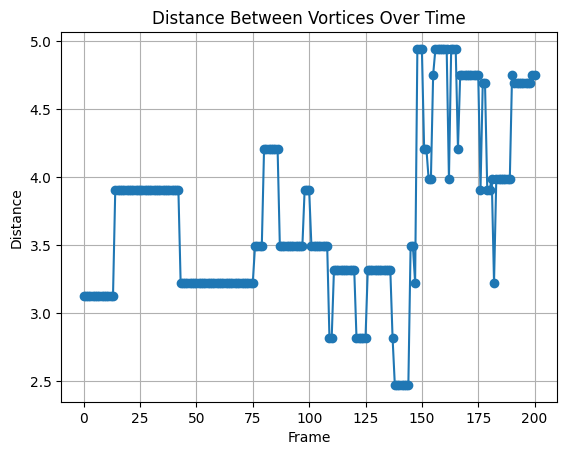

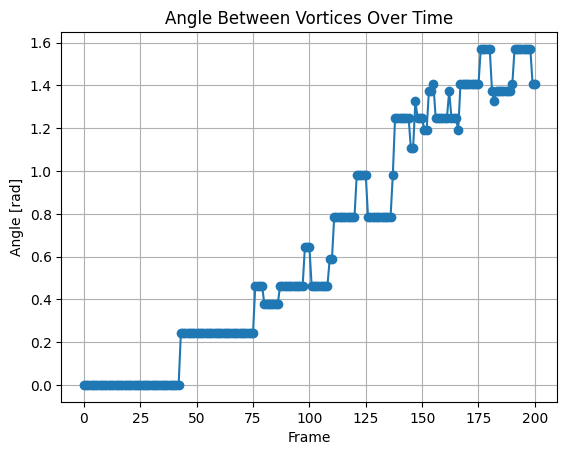

Total Imag Time:  1.2631933689117432
kmax:  4.0212385965949355
T:  1.6170359850744807
(201, 128, 128)
(1, 128, 128)


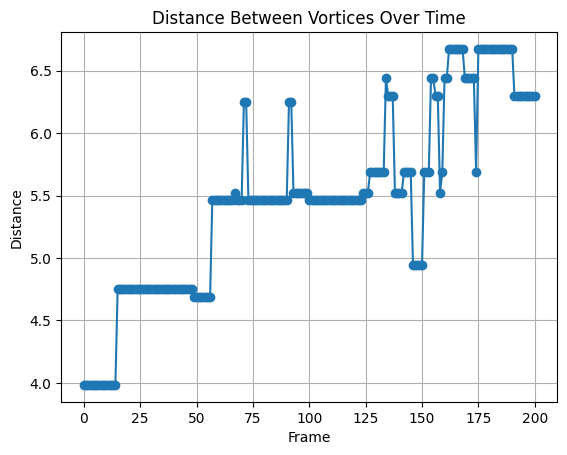

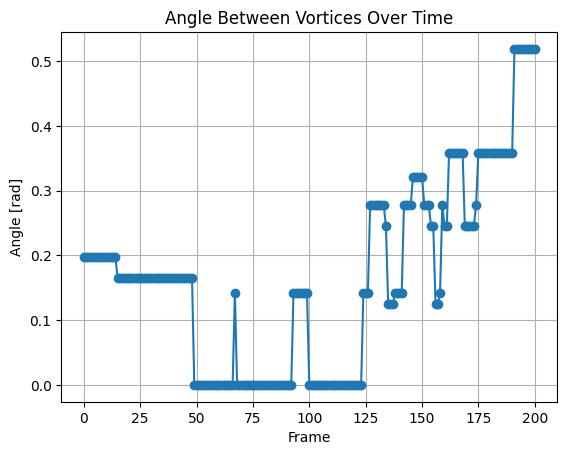

Total Imag Time:  1.277641773223877
kmax:  4.0212385965949355
T:  1.6170359850744807
(201, 128, 128)
(1, 128, 128)


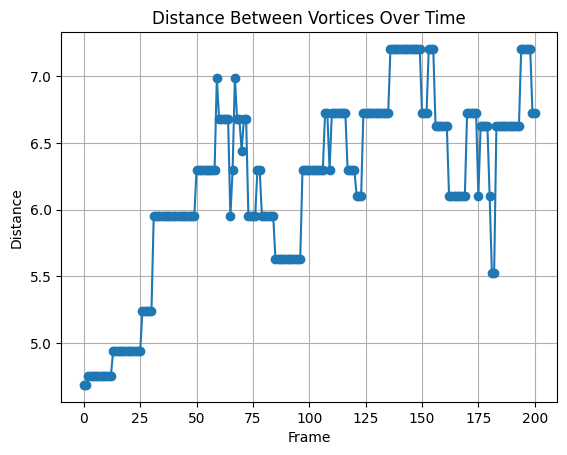

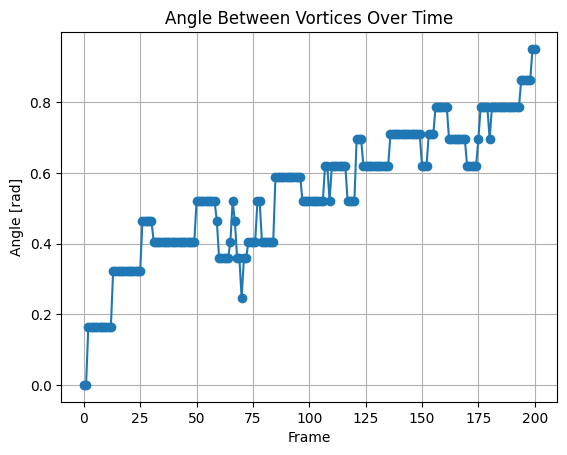

Total Imag Time:  1.2841894626617432
kmax:  4.0212385965949355
T:  2.425553977611721
(201, 128, 128)
(1, 128, 128)


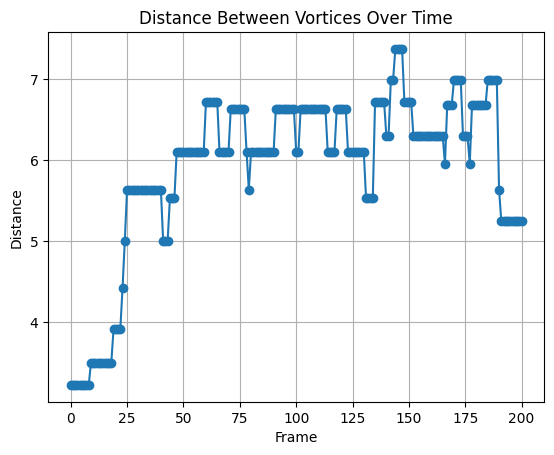

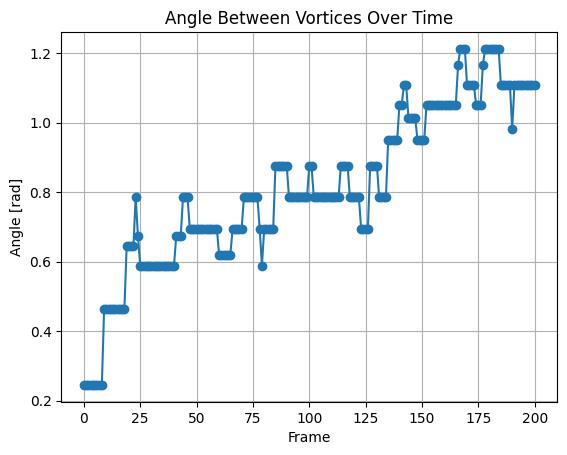

Total Imag Time:  1.2912912368774414
kmax:  4.0212385965949355
T:  2.425553977611721
(201, 128, 128)
(1, 128, 128)


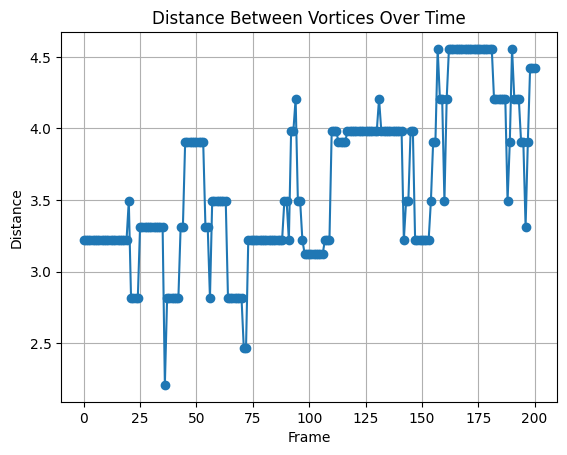

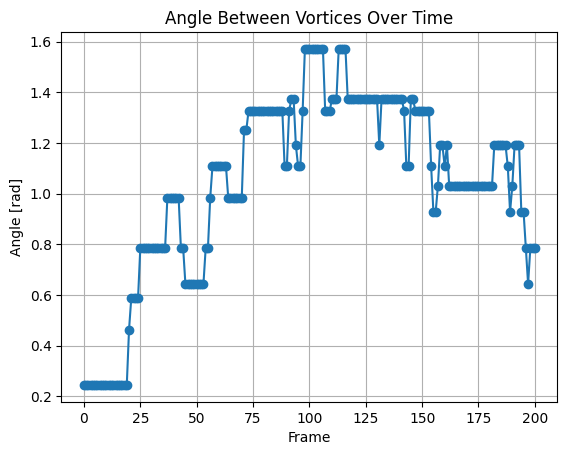

Total Imag Time:  1.272108554840088
kmax:  4.0212385965949355
T:  2.425553977611721
(201, 128, 128)
(1, 128, 128)


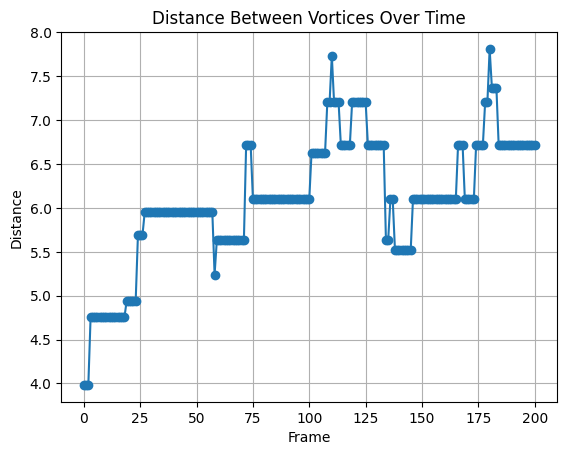

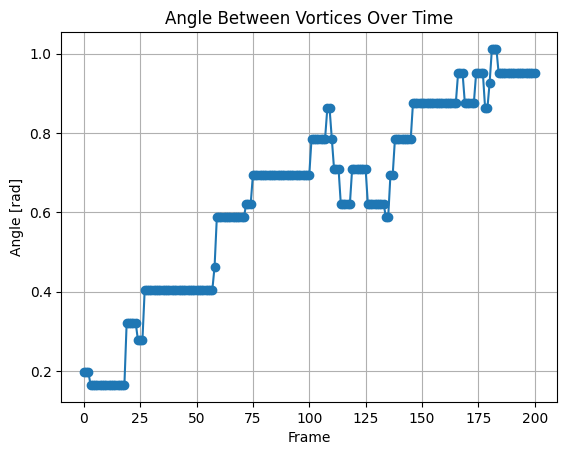

Total Imag Time:  1.2846674919128418
kmax:  4.0212385965949355
T:  3.2340719701489613
(201, 128, 128)
(1, 128, 128)


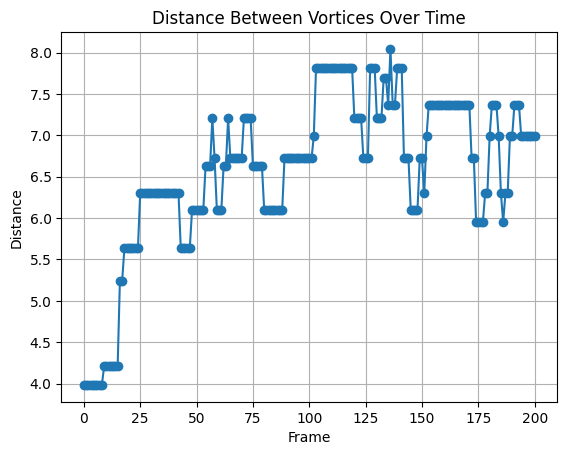

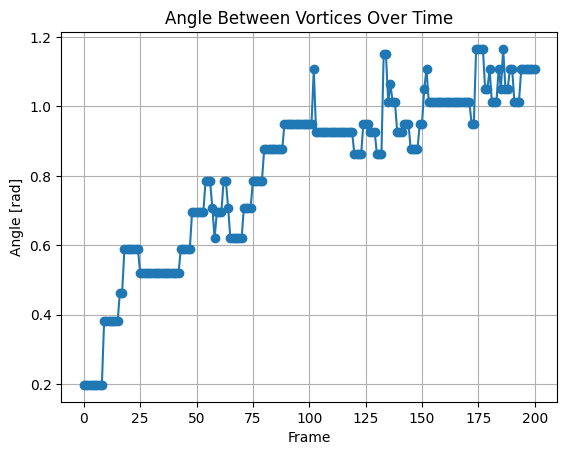

Total Imag Time:  1.285651683807373
kmax:  4.0212385965949355
T:  3.2340719701489613
(201, 128, 128)
(1, 128, 128)


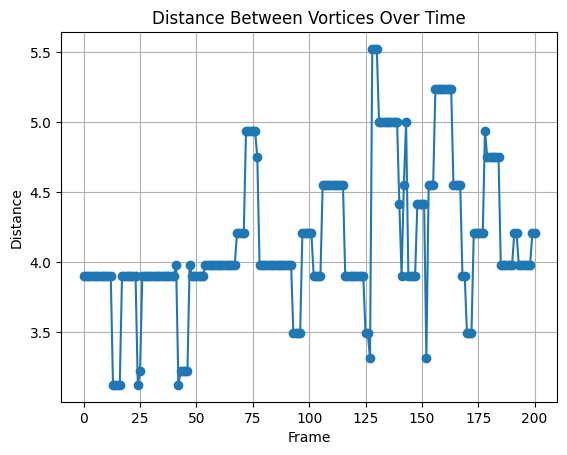

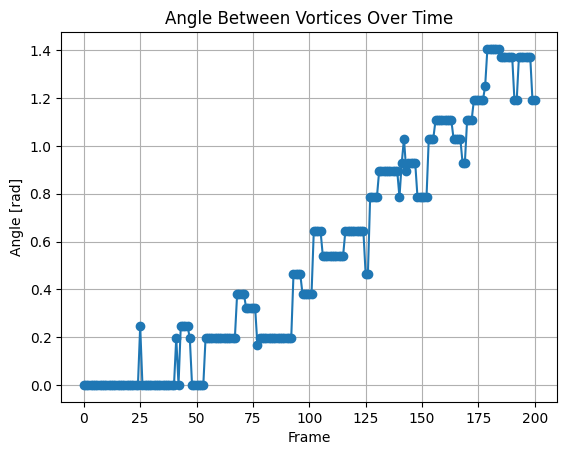

Total Imag Time:  1.286745548248291
kmax:  4.0212385965949355
T:  3.2340719701489613
(201, 128, 128)
(1, 128, 128)


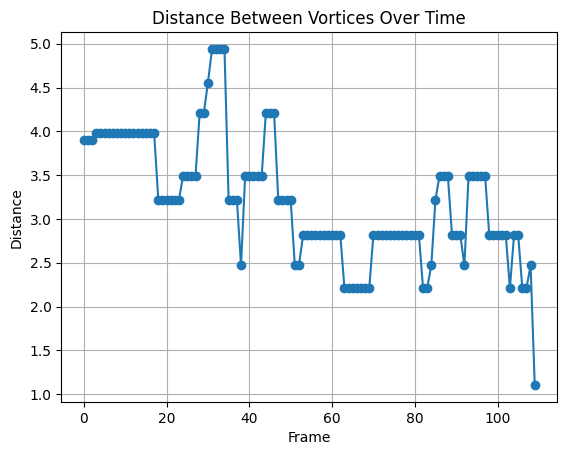

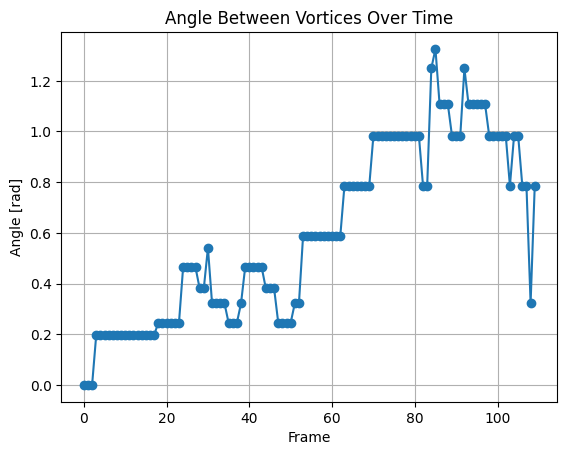

ValueError: operands could not be broadcast together with shapes (201,) (110,) (201,) 

In [2]:
c = comp() # calculate the averages over the values in the array 

### Animate the circulation with the vortex tracking overlaid 

In [2]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 1000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = False, Tfact = 0.8, dst = False, vortex = True)

Total Imag Time:  1.3213138580322266
kmax:  4.0212385965949355
T:  6.468143940297923
(5, 128, 128)
(1, 128, 128)


In [3]:
v = vt(g.snaps, g.L, g.dx) 
times,dist = zip(*v.distances) 
times,angles = zip(*v.angles)

[[0 0]
 [3 0]]
[[24.609375 24.609375]
 [28.515625 25.390625]]
{}
[]
[[24.609375 24.609375]
 [28.515625 25.390625]]


ValueError: XA must be a 2-dimensional array.

In [51]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)
circ_frames = np.zeros((len(g.snaps), len(g.snaps[0])//2, len(g.snaps[0])//2))
vort = []
avort = []
for i in range(len(g.snaps)): 
    detection = pt.detectVortices(tracker, g.snaps[i])
    circ_frames[i] = detection[2] 
    vort.append(detection[0]) 
    avort.append(detection[1])

In [52]:
tracks = v.track_vortices_across_frames(avort)

print(sorted(tracks,  key=lambda k: len(tracks[k]), reverse = True)) 


for index, item in enumerate(tracks.items()): 
    print('Vortex: ', item[0], ' ', len(tracks[index]))

[1, 3, 96, 112, 85, 71, 134, 141, 110, 0, 117, 65, 46, 113, 41, 124, 129, 130, 140, 47, 99, 128, 84, 57, 64, 73, 9, 38, 43, 56, 98, 119, 151, 17, 53, 54, 66, 123, 135, 138, 145, 153, 5, 14, 55, 60, 77, 86, 87, 111, 136, 154, 11, 18, 25, 26, 42, 44, 83, 102, 104, 131, 139, 149, 2, 4, 6, 10, 13, 16, 19, 29, 33, 34, 37, 48, 51, 58, 59, 68, 70, 74, 75, 80, 81, 82, 92, 100, 101, 103, 105, 107, 126, 144, 146, 147, 150, 7, 8, 12, 15, 20, 21, 22, 23, 24, 27, 28, 30, 31, 32, 35, 36, 39, 40, 45, 49, 50, 52, 61, 62, 63, 67, 69, 72, 76, 78, 79, 88, 89, 90, 91, 93, 94, 95, 97, 106, 108, 109, 114, 115, 116, 118, 120, 121, 122, 125, 127, 132, 133, 137, 142, 143, 148, 152, 155]
Vortex:  0   16
Vortex:  1   201
Vortex:  2   2
Vortex:  3   201
Vortex:  4   2
Vortex:  5   4
Vortex:  6   2
Vortex:  7   1
Vortex:  8   1
Vortex:  9   6
Vortex:  10   2
Vortex:  11   3
Vortex:  12   1
Vortex:  13   2
Vortex:  14   4
Vortex:  15   1
Vortex:  16   2
Vortex:  17   5
Vortex:  18   3
Vortex:  19   2
Vortex:  20   

In [27]:
# compare distances
p_3 = (3, 22.265625, 24.609375)
p_5 = (3, 24.609375, 25.390625)
next_point = (4, 24.609375, 25.390625)

d_3 = np.sqrt(np.abs(p_3[1]-next_point[1])**2 + np.abs(p_3[2]-next_point[2])**2)
d_5 = np.sqrt(np.abs(p_5[1]-next_point[1])**2 + np.abs(p_5[2]-next_point[2])**2)
print(d_3) 
print(d_5)

2.4705294220065466
0.0


In [53]:
for vortex_id, path in tracks.items():
    print(f"Vortex {vortex_id}: {path}")

Vortex 0: [(0, 22.265625, 7.421875), (1, 22.265625, 7.421875), (2, 22.265625, 7.421875), (3, 22.265625, 6.640625), (4, 22.265625, 6.640625), (5, 22.265625, 6.640625), (6, 22.265625, 6.640625), (7, 22.265625, 6.640625), (8, 22.265625, 6.640625), (9, 22.265625, 6.640625), (10, 22.265625, 6.640625), (11, 23.046875, 6.640625), (12, 23.046875, 6.640625), (13, 23.046875, 6.640625), (14, 22.265625, 5.078125), (15, 21.484375, 5.078125)]
Vortex 1: [(0, 20.703125, 24.609375), (1, 20.703125, 24.609375), (2, 23.828125, 24.609375), (3, 23.828125, 24.609375), (4, 23.828125, 24.609375), (5, 23.828125, 24.609375), (6, 23.828125, 24.609375), (7, 23.828125, 24.609375), (8, 23.828125, 24.609375), (9, 23.828125, 24.609375), (10, 23.828125, 24.609375), (11, 23.828125, 24.609375), (12, 23.828125, 24.609375), (13, 23.828125, 24.609375), (14, 23.828125, 24.609375), (15, 23.828125, 24.609375), (16, 23.828125, 24.609375), (17, 23.828125, 24.609375), (18, 23.828125, 24.609375), (19, 23.828125, 24.609375), (20, 2

In [54]:
print(np.shape(v.distance_matrix))

(8, 9)


In [55]:
print(len(circ_frames)) 

201


0
1
2
3


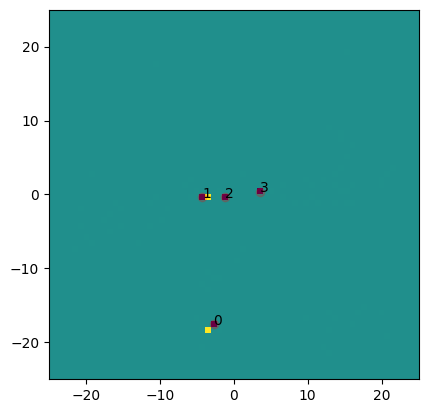

In [75]:
time = 0
plt.imshow(circ_frames[time], origin = 'lower', extent = [-g.L/2, g.L/2, -g.L/2, g.L/2])
for i in range(len(tracks)): 
    for j in range(len(tracks[i])): 
        if tracks[i][j][0] == time: 
            print(i)
            plt.scatter(tracks[i][j][1]-g.L/2, tracks[i][j][2]-g.L/2, alpha = 0.2, color = 'red')
            plt.text(tracks[i][j][1]-g.L/2, tracks[i][j][2]-g.L/2, i)

Give the initial condition of the vortices that need to be tracked - use this as the starting values and the just track these two based on the initial locations 
Only need 2 trajectories 

In [65]:
print(avort[0:3])

[array([[22.265625,  7.421875],
       [20.703125, 24.609375],
       [23.828125, 24.609375],
       [28.515625, 25.390625]]), array([[22.265625,  7.421875],
       [20.703125, 24.609375],
       [23.828125, 24.609375],
       [28.515625, 25.390625]]), array([[22.265625,  7.421875],
       [37.890625,  9.765625],
       [44.140625,  9.765625],
       [23.828125, 24.609375],
       [28.515625, 25.390625],
       [38.671875, 33.984375]])]


In [66]:
tracks_subset = v.track_vortices_across_frames(avort[0:3])

In [70]:
for vortex_id, path in tracks_subset.items():
    print(f"Vortex {vortex_id}: {path}")

Vortex 0: [(0, 22.265625, 7.421875), (1, 22.265625, 7.421875), (2, 22.265625, 7.421875)]
Vortex 1: [(0, 20.703125, 24.609375), (1, 20.703125, 24.609375), (2, 23.828125, 24.609375)]
Vortex 2: [(0, 23.828125, 24.609375), (1, 23.828125, 24.609375)]
Vortex 3: [(0, 28.515625, 25.390625), (1, 28.515625, 25.390625), (2, 28.515625, 25.390625)]
Vortex 4: [(2, 37.890625, 9.765625)]
Vortex 5: [(2, 44.140625, 9.765625)]
Vortex 6: [(2, 38.671875, 33.984375)]


In [67]:
print(v.distance_matrix)
print(np.argmin)

[[ 0.         15.79980345 22.00019975 17.25837659 19.02468072 31.22068938]
 [17.25837659 22.7100654  27.74262641  3.125       7.85146533 20.26737777]
 [17.25837659 20.44726926 25.15819092  0.          4.75215823 17.5564102 ]
 [19.02468072 18.22172467 22.09708691  4.75215823  0.         13.3042081 ]]


### Animation In progress

In [6]:
# try with just two vortices 

def generalAnimation(filename, dataset, periodic = False): 
    time_tracking = np.arange(0, len(dataset))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    if not periodic: 
        data = plt.imshow(dataset[0],  extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], origin = 'lower')
    else: 
        data = plt.imshow(dataset[0], extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = 'twilight', origin = 'lower')
    plt.colorbar() 
    plt.clim(-2*np.pi, 2*np.pi)

     
    L = g.L

    # avi_traj1 = antiv_traj_arr[0] # the trajecory of the ith antivortex 
    # v1 = plt.scatter(avi_traj1[0][0]+0.5-L/2, avi_traj1[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')

    # avi_traj2 = antiv_traj_arr[1] # the trajecory of the ith antivortex 
    # v2 = plt.scatter(avi_traj2[0][0]+0.5-L/2, avi_traj2[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')


    # try storing in an array 
#     vort_arr = [] 
    
#     for i in range(len(antiv_traj_arr)): 
#          avi_traj = antiv_traj_arr[i] 
#          v = plt.scatter(avi_traj[0][0]+0.5-L/2, avi_traj[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')
#          vort_arr.append(v) 
    ### 
    # v1 = vort_arr[0]
    # v2 = vort_arr[1]


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(dataset[i])


     #    for j in range(len(vort_arr)): 
     #         vort_arr[j].set_offsets([antiv_traj_arr[j][i][0]+0.5-L/2, antiv_traj_arr[j][i][1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
        #return data, time_text

        #vort_arr = [v1,v2]
        return data, time_text
    anim = animation.FuncAnimation(fig, animate, frames = len(dataset), blit = True)
    anim.save(path)
    
    plt.show() 

    return anim 
    

In [31]:
# try with just two vortices 

def generalAnimation2(filename, dataset, tracks, periodic = False): 
    time_tracking = np.arange(0, len(dataset))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    if not periodic: 
        data = plt.imshow(dataset[0],  extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], origin = 'lower')
    else: 
        data = plt.imshow(dataset[0], extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = 'twilight', origin = 'lower')
    plt.colorbar() 
    plt.clim(-2*np.pi, 2*np.pi)

     
    L = g.L

    # initial points at frame = 0 
    
    vort_arr = [] 
    label_arr = [] 
    
    for i in range(len(tracks)): 
        for j in range(len(tracks[i])): 
             if tracks[i][j][0] == 0: 
                p = plt.scatter(tracks[i][j][1]-g.L/2, tracks[i][j][2]-g.L/2, alpha = 0.2, color = 'red')
                vort_arr.append(p) 
                t = plt.text(tracks[i][j][1]-g.L/2, tracks[i][j][2]-g.L/2, i)
                label_arr.append(t)


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(dataset[i])


     #    for j in range(len(vort_arr)): 
     #         vort_arr[j].set_offsets([antiv_traj_arr[j][i][0]+0.5-L/2, antiv_traj_arr[j][i][1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
        # first update the value of vort_arr 
        vort_arr = [] 

        for j in range(len(tracks)): 
            for k in range(len(tracks[j])): 
                if tracks[j][k][0] == i: 

                    new_point = plt.scatter(tracks[j][k][1]-g.L/2, tracks[j][k][2]-g.L/2, alpha = 0.2, color = 'red')
                    vort_arr.append(new_point) 
                    vort_arr[j].set_offsets([tracks[j][k][1], tracks[j][k][2]])
        # vort_arr: 
        #for j in range(len(vort_arr)): 
            

        #vort_arr = [v1,v2]
        return data, time_text, *vort_arr
    anim = animation.FuncAnimation(fig, animate, frames = len(dataset), blit = True)
    anim.save(path)
    
    plt.show() 

    return anim 
    

In [12]:
generalAnimation('circ_.mp4', circ_frames)

NameError: name 'generalAnimation' is not defined

IndexError: list index out of range

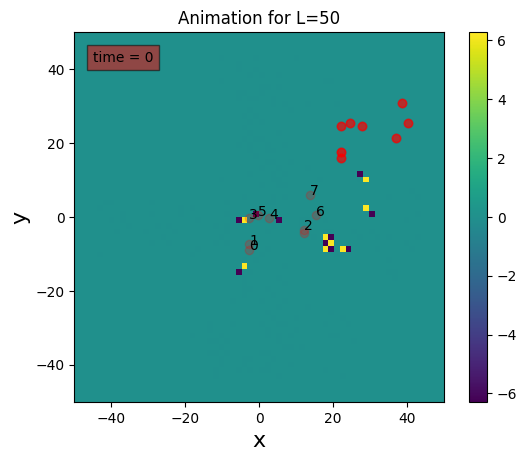

In [32]:
generalAnimation2('circ_tracking_.mp4', circ_frames, tracks)

In [ ]:
c2 = comp(numRealSteps = 500000, numSamples = 5)

TODO
- Figure out how to animate the circulation with the vortices on top...
- At the end of the simulation choose the trajectories that are closest in distance to each other at the start 
- Look into convolution